### Import dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
# This block will extract all the chunks // for now we will procede with only 1
file_path = "C:/Users/Asus/Desktop/Econom/Period 5/Data Mining/Assignment_2-practice/training_set_VU_DM.csv"
# chunksize = 1000000  # Specify the number of rows to read in each chunk
# chunks = []

# # Read the CSV file in chunks
# for chunk in pd.read_csv(file_path, chunksize=chunksize):
#     # Process each chunk (example: select specific columns or apply a function)
#     processed_chunk = chunk[['column1', 'column2']]
    
#     # Append the processed chunk to the list
#     chunks.append(processed_chunk)

# # Concatenate the processed chunks into a single DataFrame
# result_df = pd.concat(chunks)

In [4]:
# it separates the data in chunks but does not return the chunk
df = pd.read_csv(file_path) #, chunksize=chunksize)

In [5]:
df.isnull().sum()

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [6]:
# # obtain the chunk dataset
# df_sample = df.get_chunk()

#### Exploring each variable that could be important

# 1. Search ID

In [7]:
print('Number of different customers is ', len(df['srch_id'].unique()))
df['srch_id'].value_counts()

Number of different customers is  199795


244169    38
149527    38
223395    38
250956    38
6611      37
          ..
141076     5
170616     5
188142     5
110693     5
319453     5
Name: srch_id, Length: 199795, dtype: int64

# 2. Price USD

In [8]:
'Min price is ', df['price_usd'].min(), ' max price is ', df['price_usd'].max()

('Min price is ', 0.0, ' max price is ', 19726328.0)

In [9]:
df['price_usd'].value_counts()

99.00     76129
119.00    65077
109.00    64317
89.00     62561
129.00    56130
          ...  
566.55        1
756.07        1
745.18        1
672.06        1
818.18        1
Name: price_usd, Length: 76465, dtype: int64

# 3. Date

##### Around 1m visits took place in 2012, and 4m in 2013"

In [10]:
df['date_time'].min(), df['date_time'].max()

('2012-11-01 00:08:29', '2013-06-30 23:58:24')

# 4. Competition variables (sample)
###    Comp_rate --> If expedia had better / worse prices than competition
###    Comp_inv --> availability of the hotels in Expedia / competition
###    Comp_rate_percent_diff --> difference in perc. betwenn expedia's hotels and competition

In [11]:
df['comp1_rate'].value_counts()

 1.0    67256
 0.0    42959
-1.0     9715
Name: comp1_rate, dtype: int64

In [12]:
df['comp1_inv'].value_counts()

 0.0    122599
 1.0      5492
-1.0      1468
Name: comp1_inv, dtype: int64

In [13]:
df['comp1_rate_percent_diff'].value_counts()

9.0       11317
6.0       11082
7.0        9156
10.0       8582
15.0       8515
          ...  
5273.0        1
6300.0        1
4803.0        1
2195.0        1
2682.0        1
Name: comp1_rate_percent_diff, Length: 1830, dtype: int64

In [14]:
## Checking exactly which variables are missing and how much is missing
miss_values = []

for var in df.columns:
    if df[var].isna().any():
        miss_values.append((var, df[var].isna().sum()))

miss_values.sort(key=lambda x: x[1], reverse= True)

for column, missing_count in miss_values:
    print('For varaible: ', column, " the number of missing values is ", missing_count, 'Non-missings are {}'.format(len(df) - missing_count))

For varaible:  comp1_rate_percent_diff  the number of missing values is  4863908 Non-missings are 94439
For varaible:  comp6_rate_percent_diff  the number of missing values is  4862173 Non-missings are 96174
For varaible:  comp1_rate  the number of missing values is  4838417 Non-missings are 119930
For varaible:  comp1_inv  the number of missing values is  4828788 Non-missings are 129559
For varaible:  comp4_rate_percent_diff  the number of missing values is  4827261 Non-missings are 131086
For varaible:  gross_bookings_usd  the number of missing values is  4819957 Non-missings are 138390
For varaible:  comp7_rate_percent_diff  the number of missing values is  4819832 Non-missings are 138515
For varaible:  comp6_rate  the number of missing values is  4718190 Non-missings are 240157
For varaible:  visitor_hist_starrating  the number of missing values is  4706481 Non-missings are 251866
For varaible:  visitor_hist_adr_usd  the number of missing values is  4705359 Non-missings are 252988


### Concluson :
#### In terms of competition the least values that are missing are for competitors: 2,3,5,8
#### The most missings are for competitors: 1, 4, 6, 7

### Options:
#### - Maybe best one for me: If we keep the rate and inv for 2,3,5,8, because they dont go above 50% missing. Also the rate and rate_perc_diff have similar meaning, however the second is missing a lot of info
#### - Either train the model that first includes them, then excludes them
#### - or exclude the ones with 80% + missing values
#### - or apply some technique such as: Regularization /ElasticNet, because we want to remove some variables, but we also want to take the potential multicollinearity into account/

# 5. Country-related variables

In [15]:
# There is an issue with this variable, because 
# it says there are 210 countries, whereas there are just 195 in the world
df['visitor_location_country_id'].value_counts()

219    2892489
100     495476
55      290461
216     217385
220     174296
        ...   
226         25
190         24
146         15
83          13
150          8
Name: visitor_location_country_id, Length: 210, dtype: int64

In [16]:
# This one is more reasonable as it shows there are hotels from 172 countries which is fine
df['prop_country_id'].value_counts()

219    3030125
100     311283
55      186465
31      154287
99      135388
        ...   
180         12
7           10
126          7
204          5
165          2
Name: prop_country_id, Length: 172, dtype: int64

In [17]:
# We should keep this correlation in mind, because it could be important. It can state
# that cust buys room in same country or in a specific country abroad, etc...
df['prop_country_id'].corr(df['visitor_location_country_id'])

0.48278697988866043

In [62]:
# 30 % of the variable only is missing. Imputation is possible, although it could ntot be the best approach because its about distance between customer and hotel and can bias the model in a way that
# a certain distance could trigger more bookings ??!
 
df['orig_destination_distance'].value_counts()

0.38       663
0.26       549
0.39       549
0.24       540
0.25       524
          ... 
5475.61      1
3618.50      1
5469.85      1
5474.14      1
4937.44      1
Name: orig_destination_distance, Length: 530595, dtype: int64

# 6. Property data

In [18]:
# There had been 129k hotels on display for the time period
df['prop_id'].value_counts()

104517    2357
124342    2355
68420     2285
40279     2275
134154    2257
          ... 
115439       1
134795       1
57042        1
66680        1
87173        1
Name: prop_id, Length: 129113, dtype: int64

In [19]:
# How many stars was the hotel (where 0 is none or this info is not available)
df['prop_starrating'].value_counts()

3    1947598
4    1521448
2     895894
5     406485
0     169572
1      17350
Name: prop_starrating, dtype: int64

In [20]:
# The rating of the hotels
df['prop_review_score'].value_counts()

4.0    1556948
4.5    1546880
3.5     768054
3.0     375905
5.0     235947
0.0     233294
2.5     143886
2.0      62301
1.5      14465
1.0      13303
Name: prop_review_score, dtype: int64

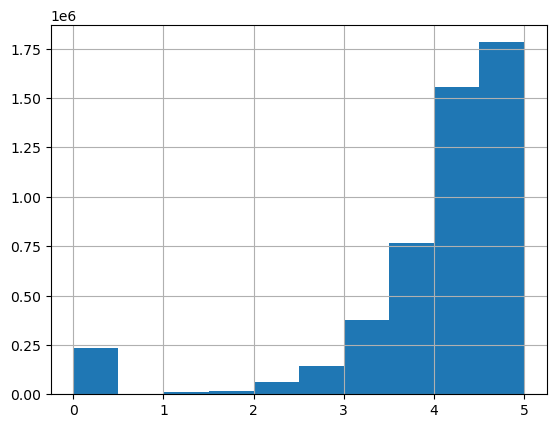

In [21]:
df['prop_review_score'].hist()
plt.show()

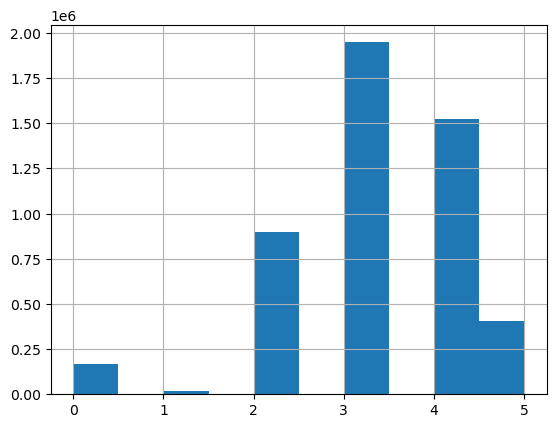

In [22]:
df['prop_starrating'].hist()
plt.show()

In [23]:
# Ratio of branded:non-branded  hotels = 3:2
df['prop_brand_bool'].value_counts()

1    3147060
0    1811287
Name: prop_brand_bool, dtype: int64

### Some info about the location variables:
The prop_location_score1 and prop_location_score2 are two different scores that measure the desirability of a hotel's location. These scores can be derived from various factors such as the distance from popular tourist attractions, the neighborhood's safety, accessibility to public transportation, and nearby amenities like restaurants and shopping centers. We can treat these scores as two separate features that provide some indication of how desirable a hotel's location is.

In [24]:
df['prop_location_score2'].max(), df['prop_location_score1'].max(),\
df['prop_location_score2'].min(), df['prop_location_score1'].min()

(1.0, 6.98, 0.0, 0.0)

A score of 0 for either prop_location_score1 or prop_location_score2 would likely indicate a low desirability for the hotel's location. This could mean that the hotel is located far from popular attractions, in an area with limited amenities, or in a neighborhood perceived as less safe.

In [25]:
# The price for which the hotel was traded // if 0 then its not traded
df['prop_log_historical_price'].value_counts()

0.00    713899
6.21     88837
5.02     36267
5.07     35177
4.98     35118
         ...  
2.55         1
2.26         1
1.67         1
2.49         1
2.34         1
Name: prop_log_historical_price, Length: 392, dtype: int64

# 7. Visitor history varaibles

In [26]:
df['visitor_hist_adr_usd'].value_counts()

128.34    609
117.68    579
270.36    514
65.00     275
117.86    250
         ... 
53.08       5
182.56      5
234.77      5
153.44      5
99.39       5
Name: visitor_hist_adr_usd, Length: 7799, dtype: int64

In [27]:
'The mean value a customer spent in the past for the hotel is ', df['visitor_hist_adr_usd'].mean(),\
' The max value a cust spent before was ', df['visitor_hist_adr_usd'].max(),\
' and the min value was ', df['visitor_hist_adr_usd'].where(df['visitor_hist_adr_usd'] > 0.0).nsmallest(1).min()

('The mean value a customer spent in the past for the hotel is ',
 176.02265913798277,
 ' The max value a cust spent before was ',
 1958.7,
 ' and the min value was ',
 8.46)

##### 0.0 indicates that the specific customer never purchased a room

## One idea here: We can create a varaible (smth like returning customer) to check if this is the type of custoemr that regularly visits the hotel or regularly purchases rooms on Expedia (based on how many times he had bought a room, we can make a binary new variable)  Or we an compare this variable with srch_id to see how often someone searches to be classified as a 'regular' customer, or at least a seriously potential buyer'

## Also we can consider some avg. amount spent per person in the past to figure out how probably is that they buy again (e.g could be that people who spent a lot or actually almost nothing, tend to book again through expedia) - this could later be related to the competition variables to decide how price determined the visits in the past or smth like that 

## Also there could be some relation between times they visit the website and amount they spend

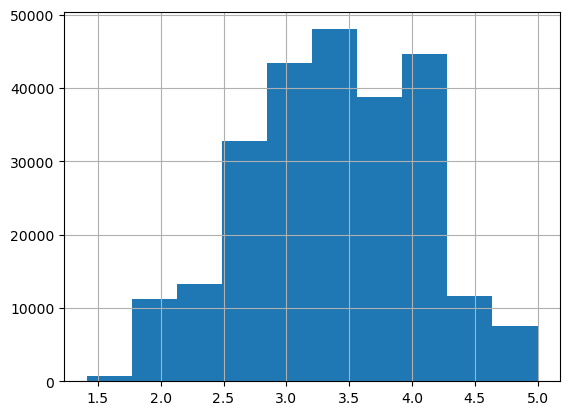

In [28]:
df['visitor_hist_starrating'].hist()
plt.show()

In [29]:
# Serious amount of the varaibles are missing
print(df['visitor_hist_starrating'].isna().sum())

4706481


In [30]:
filtered_ratings = df['visitor_hist_starrating'].where((df['visitor_hist_starrating'] >= 2.5) & (df['visitor_hist_starrating'] <= 4.5))
print("Percentage of ratings between 2.5 and 4.5: ", filtered_ratings.count()/df['visitor_hist_starrating'].count())

Percentage of ratings between 2.5 and 4.5:  0.8615970396957112


## Since this seems like a valuable variable that can determine if a customer would use Expedia for booking again, we can either keep it as it is (or potentially impute random values between 1.5 and 5 based on the above almost normal distribution)

# 8.Variables that are only for the training: Position, click_bool, booking_bool, gross_booking_usd

In [31]:
df['position'].max()

40

In [32]:
df['click_bool'].value_counts()
# if value is 1, cust. clicked on it

0    4736468
1     221879
Name: click_bool, dtype: int64

In [33]:
df['booking_bool'].value_counts()
# if value is 1, cust. booked the hotel

0    4819957
1     138390
Name: booking_bool, dtype: int64

#### The price for the actuall gross booking and the price shown on the offer differs ( mean values are similar, however the outliers are quite different ( and possibly it's not only due to texes, fees and conventions)) /// maybe its currency related (although the big outliers are in USD, whereas the reasonable values for price are not specified by a currency.)

In [34]:
df['gross_bookings_usd'].min(), df['gross_bookings_usd'].max(), df['gross_bookings_usd'].mean(),\
df['price_usd'].min(), df['price_usd'].max(), df['price_usd'].mean()

(0.0, 159292.38, 386.28331591878015, 0.0, 19726328.0, 254.20958985524828)

In [35]:
df['price_usd'].max() - df['gross_bookings_usd'].max()

19567035.62

In [36]:
# Correlation between the two prices tho is low
df['price_usd'].corr(df['gross_bookings_usd'])

0.007575328286871014

# 9.Promotion var

In [37]:
# Almost 1/5th hotels offered a discount
df['promotion_flag'].value_counts()

0    3889229
1    1069118
Name: promotion_flag, dtype: int64

In [42]:
df['position'].corr(df['promotion_flag'])

-0.10362119804553975

# 10. Search-related varaibles

In [38]:
# There are 18k destination in Expedia
df['srch_destination_id'].value_counts()

8192     69832
4562     57090
9402     40629
8347     33274
10979    33264
         ...  
2405         5
21979        5
16506        5
4036         5
22915        5
Name: srch_destination_id, Length: 18127, dtype: int64

In [44]:
# Most customers syaed 1 day, and some stayed at most 57 days
df['srch_length_of_stay'].max()

57

The rch_booking_window variable represents the number of days between the date when the search was made and the date when the hotel stay begins. In other words, it tells us how far in advance the customer is searching for a hotel stay.

For example, if a user searches for a hotel on January 1st, and they plan to stay at the hotel starting from January 10th, the rch_booking_window would be 9 days. This is because the user is searching for a hotel 9 days before their stay begins.

Understanding the booking window can be valuable for the recommendation system because it may help capture user preferences and behaviors. For instance, some customers may plan their trips well in advance, while others may search for hotels at the last minute. Different types of customers might have different preferences and requirements, and considering the booking window could help improve the recommendations.

In [45]:
# Around 50% of the people are booking at most 100 days before the actual day the check in
df['srch_booking_window'].value_counts()

1      374949
0      276815
2      244186
3      206126
4      183088
        ...  
421         5
433         5
419         5
478         5
403         5
Name: srch_booking_window, Length: 429, dtype: int64

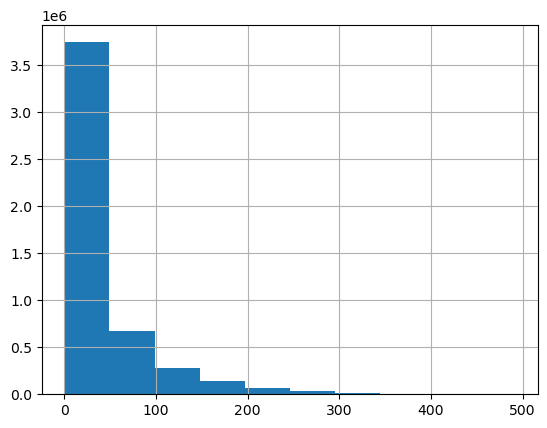

In [46]:
df['srch_booking_window'].hist()
plt.show()

In [51]:
df['srch_adults_count'].value_counts() , df['srch_children_count'].value_counts()

(2    3246234
 1    1156861
 4     242176
 3     239029
 6      31043
 5      27056
 8      10300
 7       4435
 9       1213
 Name: srch_adults_count, dtype: int64,
 0    3811774
 1     675701
 2     386976
 3      58080
 4      19829
 5       2949
 6       2066
 8        574
 7        332
 9         66
 Name: srch_children_count, dtype: int64)

### Here we can just combine the number of adults and hcildren in the room and have one common variable, no need for 2

In [52]:
df['srch_room_count'].value_counts()

1    4520212
2     369152
3      47656
4      12175
5       3829
6       2181
8       1959
7       1183
Name: srch_room_count, dtype: int64

In [57]:
# Maybe vars like this one that have no much logical relation and are indeed not correlated can be remved?
df['srch_room_count'].corr(df['position']),\
df['srch_saturday_night_bool'].corr(df['position']) # ?

(-0.024656651017208875, -0.0035602808554934286)

In [54]:
# This variable indicates if the lenght of stay is at least 4 days and includes the weekend
df['srch_saturday_night_bool'].value_counts()

1    2490145
0    2468202
Name: srch_saturday_night_bool, dtype: int64

In [58]:
# This var indicates the log probability a hotel could be clicked on the internet, 
df['srch_query_affinity_score'].value_counts()

-6.1394     198
-6.2064     183
-6.6835     176
-6.2856     171
-6.9845     165
           ... 
-33.4150      1
-32.9408      1
-23.3269      1
-18.3888      1
-33.4051      1
Name: srch_query_affinity_score, Length: 199387, dtype: int64

In [59]:
# This var seems logical to be included, but is missing more than 80% of its values and is lowly correlated
df['srch_query_affinity_score'].corr(df['position'])

-0.09488671812421191

# 11. Booking boolean 

Since the random_bool variable only tells you whether the sort order was random or not, it doesn't provide any information about the user's preferences or the hotel's attributes.
The random_bool variable indicates whether the displayed sort order for the search results was random or not. In other words, it tells us if the order in which the hotels were presented to the user was intentionally randomized.

In [61]:
# This variab
df['booking_bool'].corr(df['position'])

-0.1479184993886952

# Correlations

In [39]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float', 'int']).columns

# Create a correlation matrix
corr = df[numeric_cols].corr()

# Set the threshold for correlation coefficient
threshold = 0.5
# Filter out the correlations below the threshold
corr_high = corr[(corr > threshold) | (corr < -threshold)]

# # Set values below the threshold to NaN
# corr_high_filtered = corr_high.mask((corr_high <= threshold)&(corr_high >= -threshold))

# # remove the NaN values
# corr_high_filtered = corr_high_filtered.dropna(how='all', axis=0).dropna(how='all', axis=1)

In [40]:
# Stack the DataFrame to create a multi-level index Series
non_nan_corr = corr_high.stack()

corr_list = []
# Iterate through the index and values of the non-NaN correlations
for index, value in non_nan_corr.iteritems():
    if (index not in corr_list) & (index[::-1] not in corr_list) & (value != 1):
        print(f"Correlation between {index[0]} and {index[1]}: {value}")
        corr_list.append(index)
        corr_list.append(index[::-1])
    else:
        continue

Correlation between comp1_inv and comp5_inv: 0.5121213979079385
Correlation between comp2_rate and comp3_rate: 0.5100666193765137
Correlation between comp3_rate_percent_diff and comp5_rate_percent_diff: 0.5906580901194612
Correlation between comp3_rate_percent_diff and comp8_rate_percent_diff: 0.6349621788609786
Correlation between comp4_rate and comp8_rate: 0.5101329329438802
Correlation between comp5_rate and comp8_rate: 0.6366047920686759
Correlation between comp5_rate_percent_diff and comp8_rate_percent_diff: 0.5083390855828661
Correlation between comp6_rate and comp7_rate: 0.5100585883051445
Correlation between click_bool and booking_bool: 0.782888613406975


<ipython-input-40-f488bc4d1006>:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in non_nan_corr.iteritems():


In [78]:
df_corr = df.corr()

<ipython-input-78-673bd41f6603>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


## These 2 correlations seems significant, so should be taken into account: click_bool and booking_bool: 0.782888613406975

In [41]:
# Correlation between the booking, click and the position 
position_click_corr = df['position'].corr(df['click_bool'])
position_booking_corr = df['position'].corr(df['booking_bool'])

print("Correlation between position and click_bool:", position_click_corr)
print("Correlation between position and booking_bool:", position_booking_corr)

Correlation between position and click_bool: -0.16499244508537037
Correlation between position and booking_bool: -0.1479184993886952


# Next task:

### -Extract a stratified chunk of the train and the data, to have good representation of the variables within a small DF and run a regularization technique like LASSO / ElasticNet. Also we can use the decsion tree to see what recommended (significant) variables it returns 

### -Use the Imputer from Sklearn to try and impute values for varaibles that are not missing >50 % of the data???

### -Hotel cluster: The idea behind creating a hotel cluster is to group similar hotels together based on certain characteristics, such as location, price range, star rating, or any other relevant features. This can be helpful in a recommendation system, as it allows you to recommend hotels that are similar to the ones a user has previously liked or interacted with. (Benefits: easy interpretation, improved recommendation, and dimensionality reduction)

to create hotel clusters:

        prop_country_id: The ID of the country the hotel is located in.
        prop_starrating: The star rating of the hotel, from 1 to 5, in increments of 1.
        prop_review_score: The mean customer review score for the hotel on a scale out of 5, rounded to 0.5 increments.
        prop_brand_bool: +1 if the hotel is part of a major hotel chain; 0 if it is an independent hotel.
        prop_location_score1: A (first) score outlining the desirability of a hotel’s location.
        prop_location_score2: A (second) score outlining the desirability of the hotel’s location.
        price_usd: Displayed price of the hotel for the given search.
        promotion_flag: +1 if the hotel had a sale price promotion specifically displayed.
        srch_destination_id: ID of the destination where the hotel search was performed.